# Imersão Python Do Excel à Análise de Dados

### Analise utilizando banco de dados da Yahoo Finance

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Codigos

In [2]:
empresa = 'NVDA'
dados = yf.download(empresa, start='2022-01-01', end='2024-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.781036,39154700
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.482849,52715400
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.646912,49806400
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.378693,45418600
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.081940,40993900
...,...,...,...,...,...,...
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200
2024-04-01,902.989990,922.250000,892.039978,903.630005,903.630005,45244100


In [3]:
dados.columns = ['Abertura', 'Maxima', 'Minima', 'Fechamento', 'Fech_Ajust', 'Volume']
dados = dados.rename_axis('Data')
dados

,Abertura,Maxima,Minima,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.781036,39154700
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.482849,52715400
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.646912,49806400
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.378693,45418600
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.081940,40993900
...,...,...,...,...,...,...
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200
2024-04-01,902.989990,922.250000,892.039978,903.630005,903.630005,45244100


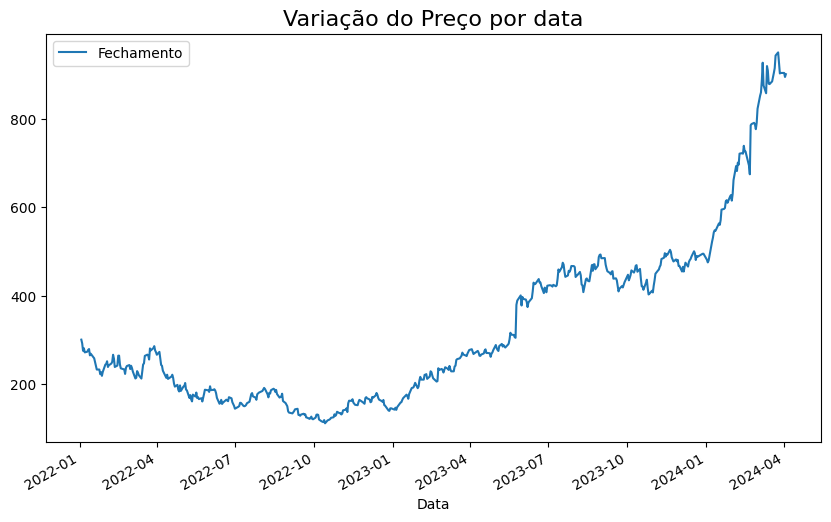

In [4]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do Preço por data',fontsize=16)
plt.legend(['Fechamento'])

In [5]:
#df = dados.head(60).copy()
df = dados
df['Data'] = df.index
df['Data'] = df['Data'].apply(mdates.date2num)
df

,Abertura,Maxima,Minima,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.781036,39154700,18995.0
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.482849,52715400,18996.0
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.646912,49806400,18997.0
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.378693,45418600,18998.0
2022-01-07,281.410004,284.220001,270.570007,272.470001,272.081940,40993900,18999.0
...,...,...,...,...,...,...,...
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700,19809.0
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200,19810.0
2024-04-01,902.989990,922.250000,892.039978,903.630005,903.630005,45244100,19814.0


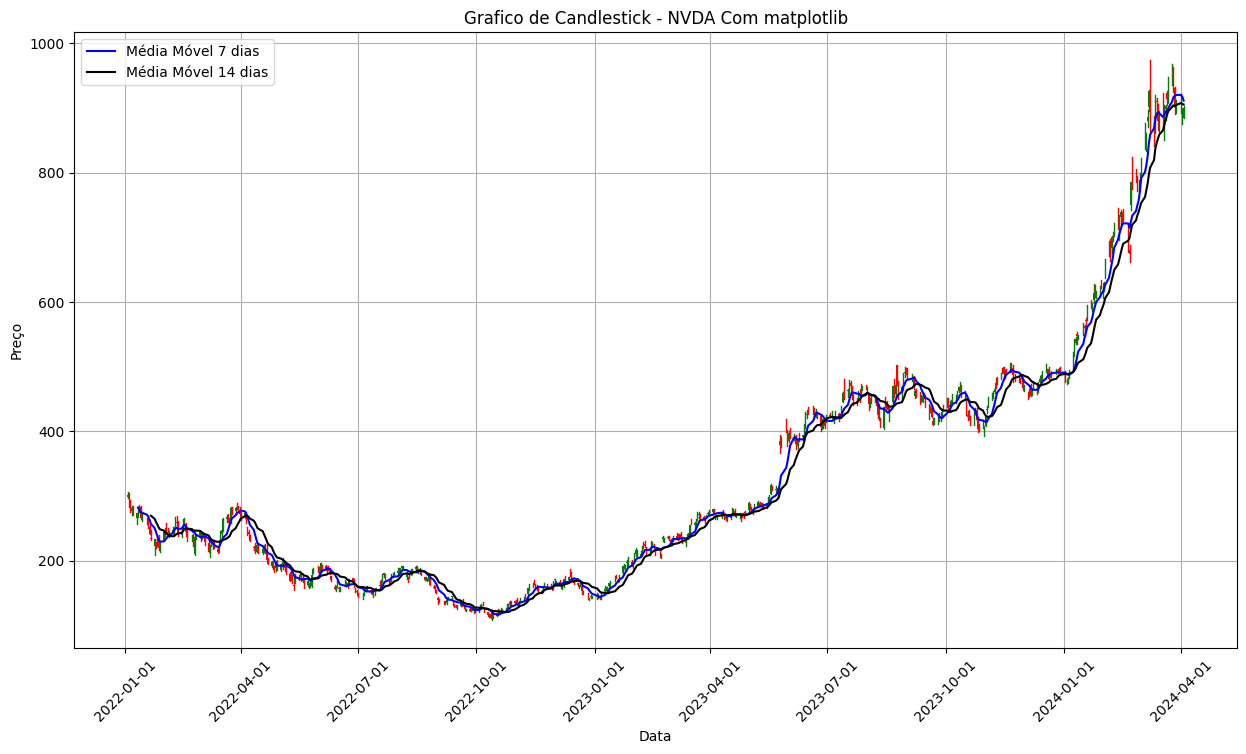

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
width = 0.7
for i in range(len(df)):
    if df['Fechamento'].iloc[i] > df['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    ax.plot([df['Data'].iloc[i], df['Data'].iloc[i]],
            [df['Minima'].iloc[i], df['Maxima'].iloc[i]],
            color=color,
            linewidth=1)
    
    ax.add_patch(plt.Rectangle((df['Data'].iloc[i] - width/2, min(df['Abertura'].iloc[i], df['Fechamento'].iloc[i])),
                               width,
                               abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]),
                               facecolor=color))
    
df['MA7'] = df['Fechamento'].rolling(window=7).mean()
df['MA14'] = df['Fechamento'].rolling(window=14).mean()
    
ax.plot(df['Data'], df['MA7'], color='blue', label='Média Móvel 7 dias')
ax.plot(df['Data'], df['MA14'], color='black', label='Média Móvel 14 dias')
ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.title(f'Grafico de Candlestick - {empresa} Com matplotlib')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.grid(True)

plt.show()

In [7]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Abertura'],
                             high=df['Maxima'],
                             low=df['Minima'],
                             close=df['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [8]:
dados = yf.download(empresa, start='2022-01-01', end='2024-12-31')

[*********************100%%**********************]  1 of 1 completed


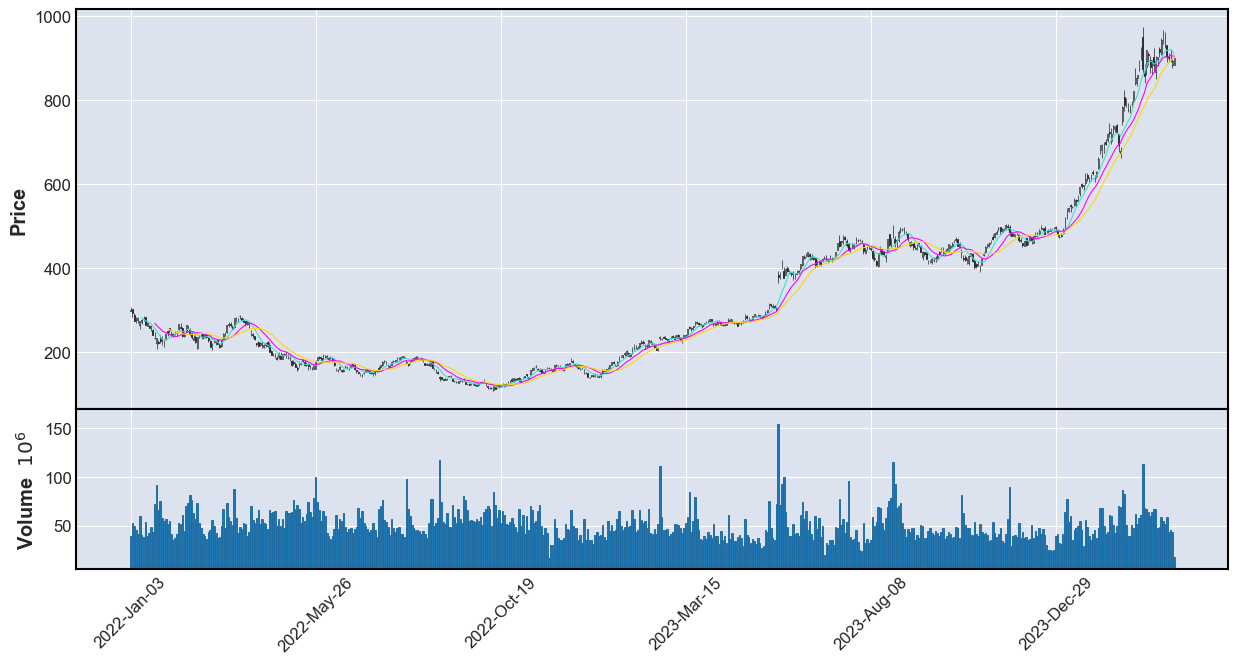

In [9]:
mpf.plot(dados, type='candle', figsize = (16,8), volume=True, mav=(7,14,21))